In [26]:
import torch
import matplotlib.pyplot as plt  # pip install matplotlib
import cv2

model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in C:\Users\verya/.cache\torch\hub\pytorch_vision_v0.10.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [27]:
import urllib
url, filename = ("https://www.shutterstock.com/image-photo/xray-chest-healthy-patient-260nw-96262043.jpg", "healthy.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [28]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-8.9123e-03,  2.1181e+00,  2.4586e+00,  2.6991e+00,  1.9602e-01,
        -3.4438e-01, -4.3218e-01, -3.6616e-01, -3.5897e-01, -1.7853e+00,
        -5.1684e+00, -5.5691e+00, -3.5865e+00, -5.2502e+00, -4.5769e+00,
        -5.2355e+00, -4.9118e+00, -4.4763e+00, -5.5643e+00, -3.6866e+00,
        -2.9804e+00, -6.3681e-01,  4.4723e-01,  2.0373e-01, -1.3702e+00,
        -2.2233e+00, -2.0762e+00, -3.6839e+00, -1.1386e+00,  1.6243e+00,
        -1.4761e+00, -4.4587e+00, -1.5489e+00,  5.4517e+00,  4.7917e+00,
         2.8711e+00,  5.3142e+00,  2.4844e+00,  3.7654e-01, -8.5057e-01,
        -3.0261e+00, -3.1515e+00, -6.2501e+00, -2.4921e+00, -1.2183e+00,
        -3.5384e-01, -1.7830e+00, -3.3654e+00, -4.1314e+00, -1.5439e-01,
         2.3335e+00, -7.1686e-01, -7.1958e-01, -4.0804e+00,  4.1688e-01,
        -2.8705e+00, -3.8116e+00, -4.6123e+00, -6.0795e-01, -2.6717e+00,
        -7.4700e-01, -2.2860e+00,  1.2850e+00,  2.9574e+00, -1.4547e+00,
        -1.6641e+00, -5.8605e-01,  5.9079e-01, -6.7

In [29]:
import urllib.request

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
file_path = "C:/Users/verya/Desktop/DS23/intro/imagenet_classes.txt"

urllib.request.urlretrieve(url, file_path)

('C:/Users/verya/Desktop/DS23/intro/imagenet_classes.txt',
 <http.client.HTTPMessage at 0x294a31426e0>)

In [30]:
with open("C:/Users/verya/Desktop/DS23/intro/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

trilobite 0.6557831764221191
isopod 0.2786318361759186
Petri dish 0.022476697340607643
honeycomb 0.005294324830174446
plastic bag 0.004094083793461323


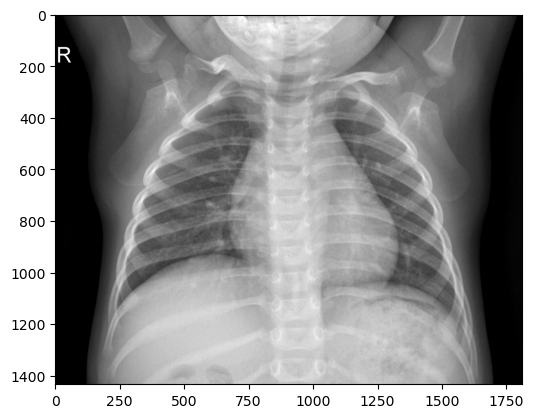

In [31]:
image_path = cv2.imread("C:/Users/verya/Desktop/DS23/intro/data/train/NORMAL/IM-0119-0001.jpeg")
plt.imshow(image_path)

In [32]:
image_path.shape

(1434, 1810, 3)

In [33]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models

# Load the image
image_path = "C:/Users/verya/Desktop/DS23/intro/data/train/NORMAL/IM-0119-0001.jpeg"  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to RGB if it has a single channel
if image.mode != "RGB":
    image = image.convert("RGB")

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to the input size expected by the model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Load the model
model = models.mobilenet_v2(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class index
_, predicted_idx = torch.max(output, 1)
predicted_class = predicted_idx.item()

print("Predicted class:", predicted_class)



Predicted class: 126


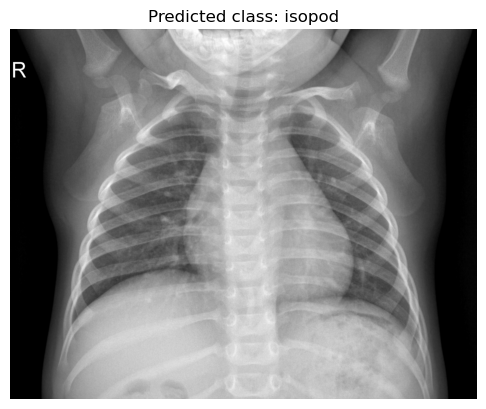

In [14]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "C:/Users/verya/Desktop/DS23/intro/data/train/NORMAL/IM-0119-0001.jpeg"  # Replace with the path to your image
image = Image.open(image_path).convert("RGB")  # Convert the image to RGB format

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to the input size expected by the model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Load the model
model = models.mobilenet_v2(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class index
_, predicted_idx = torch.max(output, 1)
predicted_class = predicted_idx.item()

# Load the class labels
with open("C:/Users/verya/Desktop/DS23/intro/imagenet_classes.txt") as f:
    class_labels = [line.strip() for line in f.readlines()]

# Plot the image
plt.imshow(np.array(image))
plt.axis('off')

# Display the predicted class label
plt.title(f"Predicted class: {class_labels[predicted_class]}")

# Show the plot
plt.show()
